# Business Statement

* The goal of this project is to analyze the characteristics of apps on the Google Play Store, including ratings, reviews, sizes, installation counts, and more. This analysis will help identify trends, outliers, and patterns in the app market, providing actionable insights for developers, marketers, and businesses to optimize their apps for better user engagement and success.

# Importing Libbraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [3]:
df = pd.read_csv('googleplaystore.csv')

# Basic checks

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# 1. Cleaning the data

In [8]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [9]:
# Handling missing values
df.dropna(subset=["Rating"], inplace=True)  # Dropping rows where Rating is missing

df["Reviews"] = pd.to_numeric(df["Reviews"], errors='coerce')
df.dropna(subset=["Reviews"], inplace=True)  # Dropping rows where Reviews are missing

df["Installs"] = df["Installs"].str.replace("+", "").str.replace(",", "").astype(float)
df["Price"] = df["Price"].str.replace("$", "").astype(float)

df["Size"] = df["Size"].replace("Varies with device", np.nan)
df["Size"] = df["Size"].str.replace("M", "e6").str.replace("k", "e3").astype(float)
df["Size"].fillna(df["Size"].median(), inplace=True)

# 2.Exploratory Data Analysis (EDA) & Visualizations

In [10]:
sns.set_style("whitegrid")

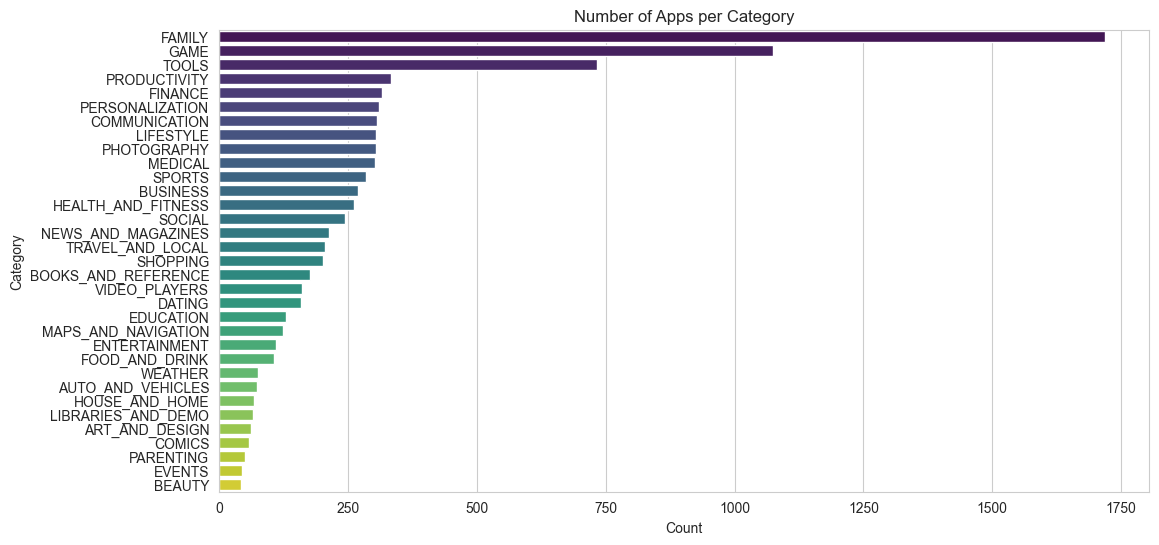

In [11]:
# Category Distribution
plt.figure(figsize=(12,6))
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette='viridis')
plt.title("Number of Apps per Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

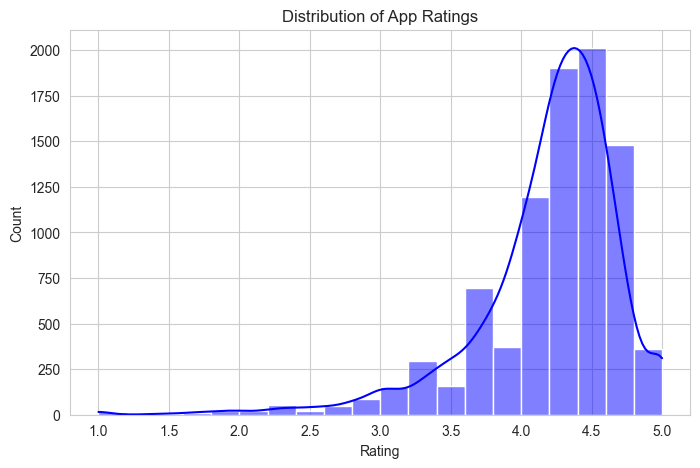

In [12]:
# Ratings Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Rating"], bins=20, kde=True, color='blue')
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.show()

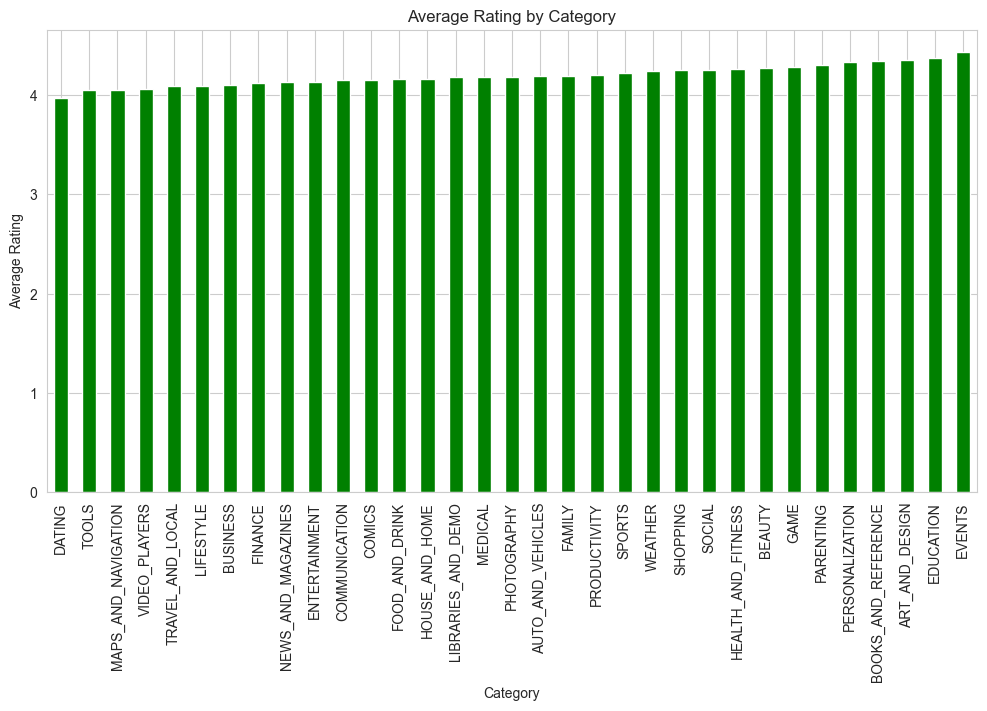

In [13]:
# Average Rating per Category
plt.figure(figsize=(12,6))
category_rating = df.groupby("Category")["Rating"].mean().sort_values()
category_rating.plot(kind='bar', color='green')
plt.title("Average Rating by Category")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=90)
plt.show()

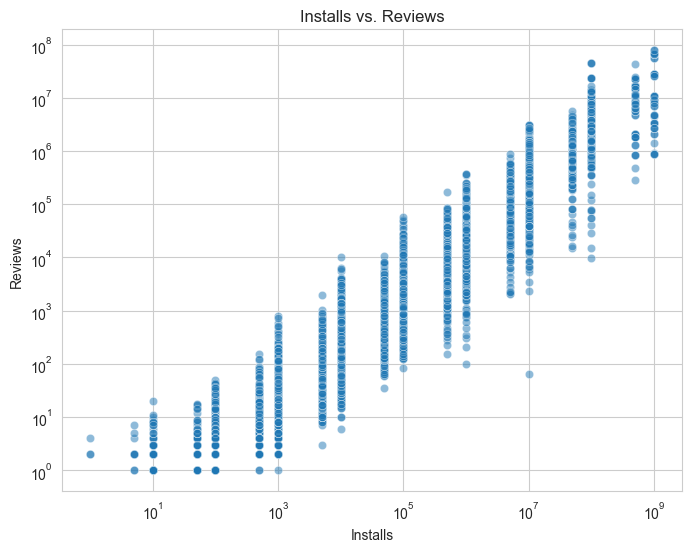

In [14]:
# Installs vs Reviews
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Installs"], y=df["Reviews"], alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Installs")
plt.ylabel("Reviews")
plt.title("Installs vs. Reviews")
plt.show()

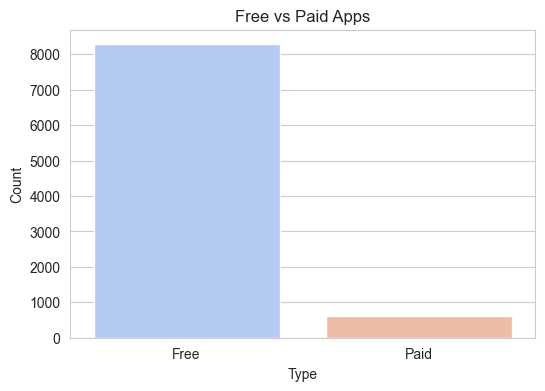

In [15]:
# Free vs Paid Apps
plt.figure(figsize=(6,4))
sns.countplot(x=df["Type"], palette='coolwarm')
plt.title("Free vs Paid Apps")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

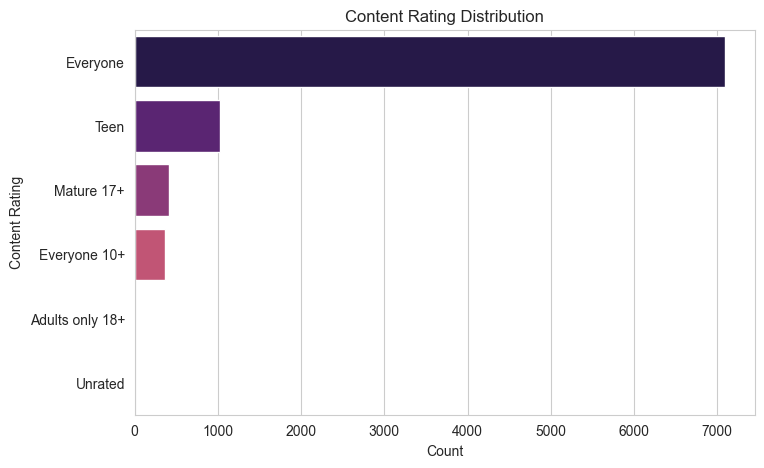

In [16]:
# Content Rating Distribution
plt.figure(figsize=(8,5))
sns.countplot(y=df["Content Rating"], order=df['Content Rating'].value_counts().index, palette='magma')
plt.title("Content Rating Distribution")
plt.xlabel("Count")
plt.ylabel("Content Rating")
plt.show()

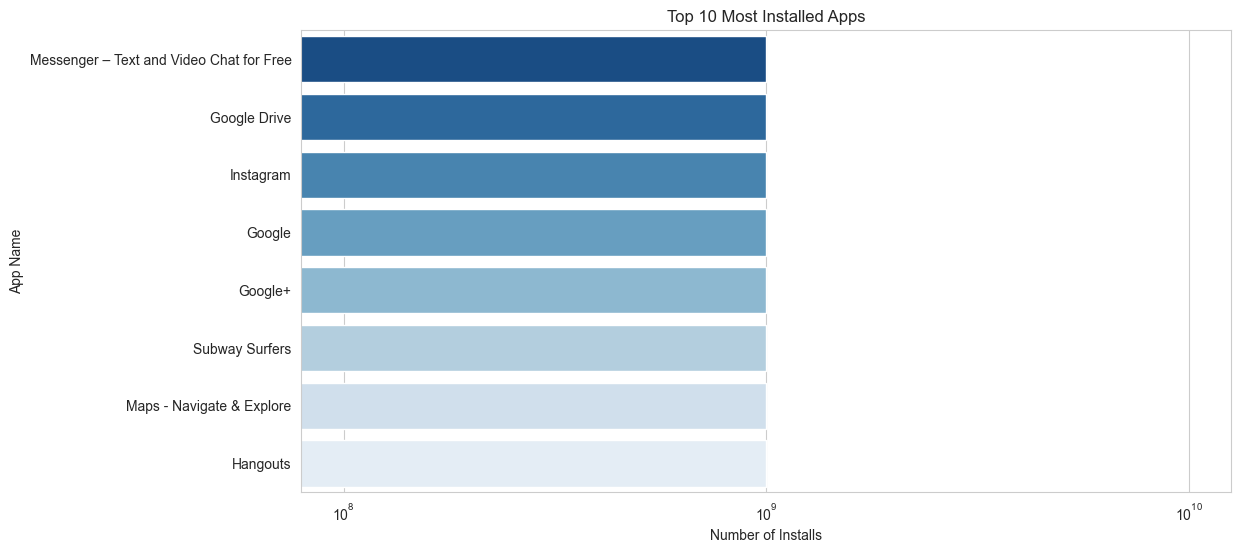

In [17]:
# Top 10 Most Installed Apps
top_installed_apps = df.sort_values(by='Installs', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_installed_apps['Installs'], y=top_installed_apps['App'], palette='Blues_r')
plt.title("Top 10 Most Installed Apps")
plt.xlabel("Number of Installs")
plt.ylabel("App Name")
plt.xscale("log")
plt.show()

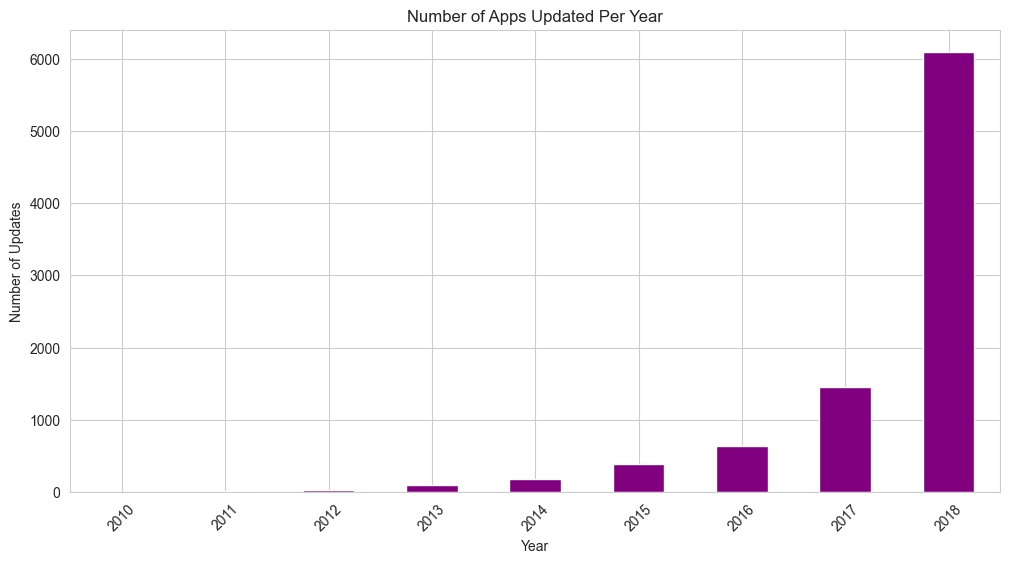

In [18]:
# Trend of App Updates Over Time
df["Last Updated"] = pd.to_datetime(df["Last Updated"], errors='coerce')
plt.figure(figsize=(12,6))
df["Last Updated"].dt.year.value_counts().sort_index().plot(kind='bar', color='purple')
plt.title("Number of Apps Updated Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Updates")
plt.xticks(rotation=45)
plt.show()

# 3. Additional Analysis: Correlation & Trends

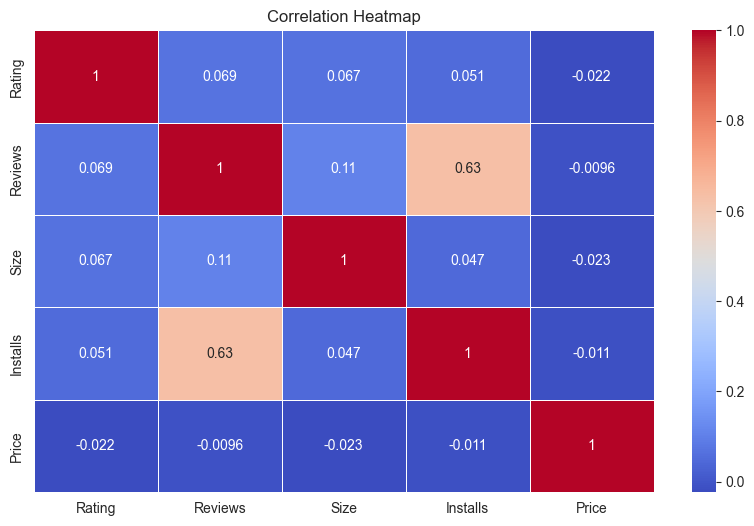

In [20]:
# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

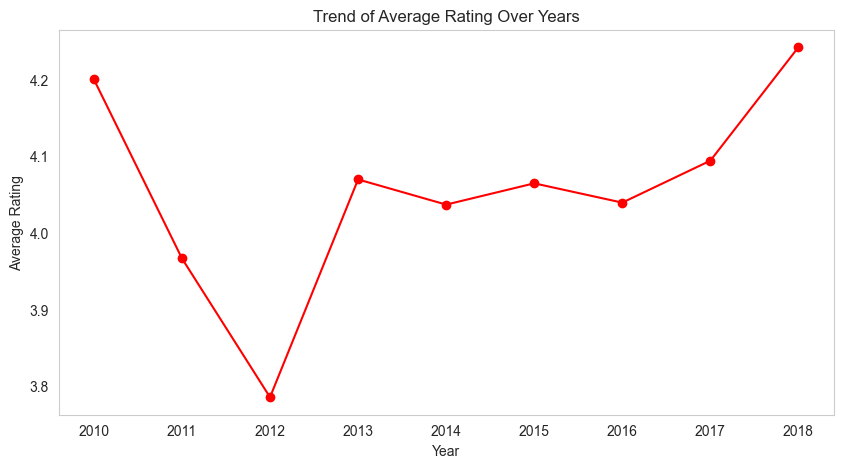

In [21]:
# Trend of Average Rating Over Years
rating_trend = df.groupby(df["Last Updated"].dt.year)["Rating"].mean()
plt.figure(figsize=(10,5))
plt.plot(rating_trend.index, rating_trend.values, marker='o', linestyle='-', color='red')
plt.title("Trend of Average Rating Over Years")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid()
plt.show()

In [22]:
print("Analysis Completed Successfully!")

Analysis Completed Successfully!
